# Life Expectancy and GDP Data Visualization Project

## Project Scoping

### Questions to answer
#### Univariate Stats
* Life expectancy
* GDP
* Year (min, max)
* Country (unique values)

#### Bivariate Stats
* How has the life expectancy change over the years
* How has the GDP change over the years
* How does life expectancy relate to GDP

#### Multivariate Stats
* How has the life expectancy changed for each country over the years?
* How has the GDP changed for each country over the years?

In [80]:
import pandas as pd

data_df = pd.read_csv("all_data.csv")
print(data_df.head())
print(data_df.tail())

print(data_df.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            ----------

In [81]:
print(data_df.describe())

print(data_df["Country"].unique())
print(data_df["Country"].nunique())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
6


The data comes with 6 countries, each with GDP data and Life expectancy at birth for 15 years, from 2000 to 2015. 

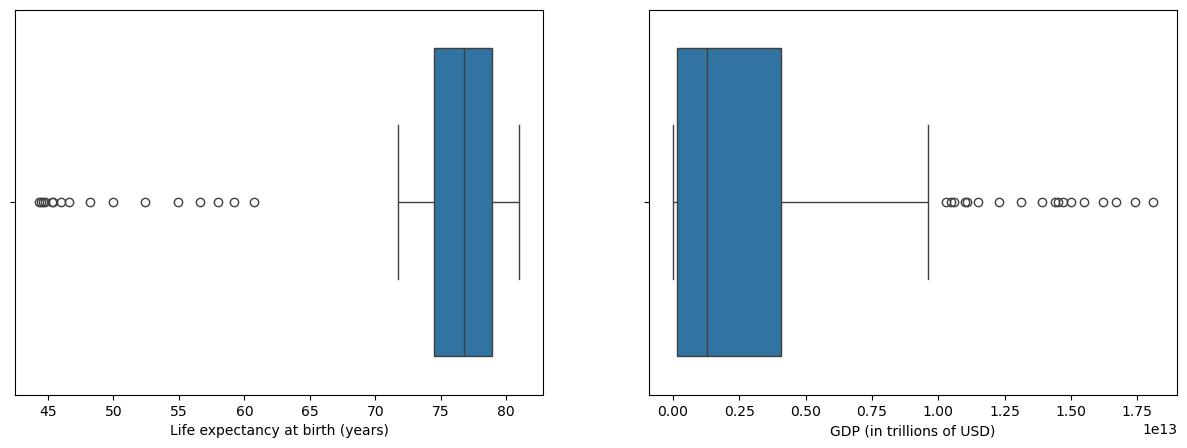

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_df['Life expectancy at birth (years)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=data_df['GDP'])
plt.xlabel('GDP (in trillions of USD)')

plt.savefig("box_plot.png")
plt.show()

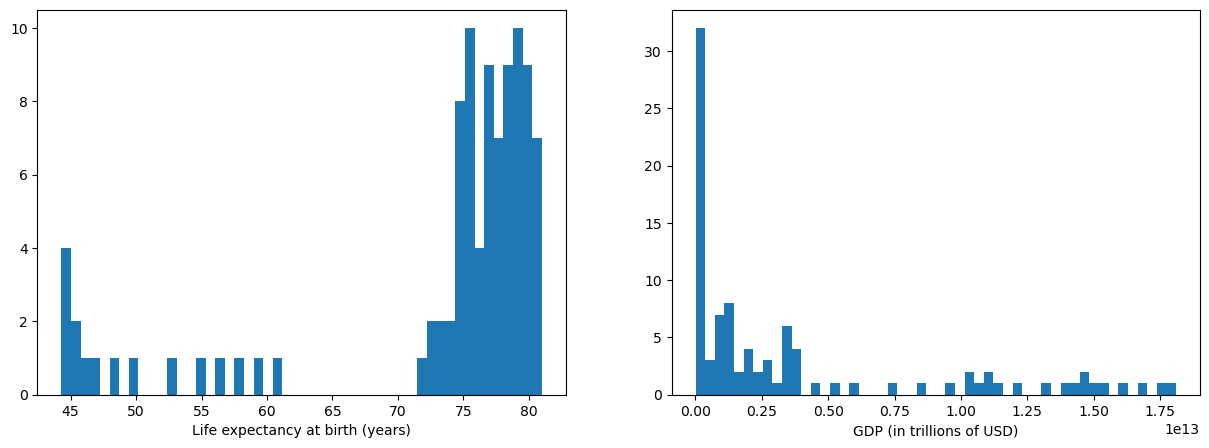

In [83]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(data_df['Life expectancy at birth (years)'], bins=50)
plt.xlabel('Life expectancy at birth (years)')

plt.subplot(1, 2, 2)
plt.hist(data_df['GDP'], bins=50)
plt.xlabel('GDP (in trillions of USD)')

plt.savefig("hist.png")
plt.show()

The Life expectancy at birth has an average of about 72, and a median of about 76. There are a lot of outliers at the lower end, making the data left-skewed.

The GDP has an average of about 3.8 trillion, and a median of about 1.28 trillion. There are a lot of outliers at the higher end, making the data right-skewed.

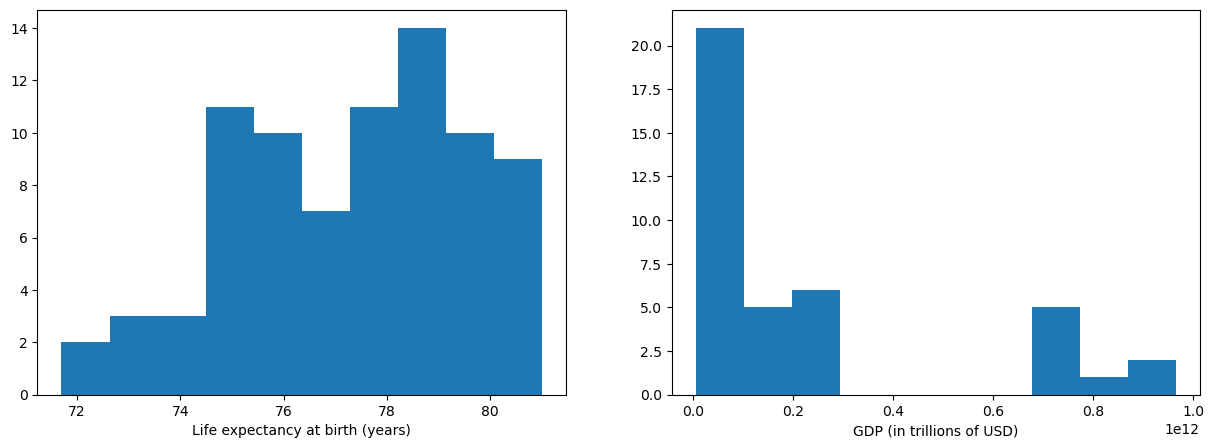

In [84]:
filtered_life_expectancy = data_df[data_df['Life expectancy at birth (years)'] > 65]
filtered_gdp = data_df[data_df['GDP'] < 1000000000000]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(filtered_life_expectancy['Life expectancy at birth (years)'], bins=10)
plt.xlabel('Life expectancy at birth (years)')

plt.subplot(1, 2, 2)
plt.hist(filtered_gdp['GDP'], bins=10)
plt.xlabel('GDP (in trillions of USD)')

plt.savefig("hist_adjusted.png")
plt.show()

When we cut of the outliers from the visualization, we get a better sence of the distribution of the data

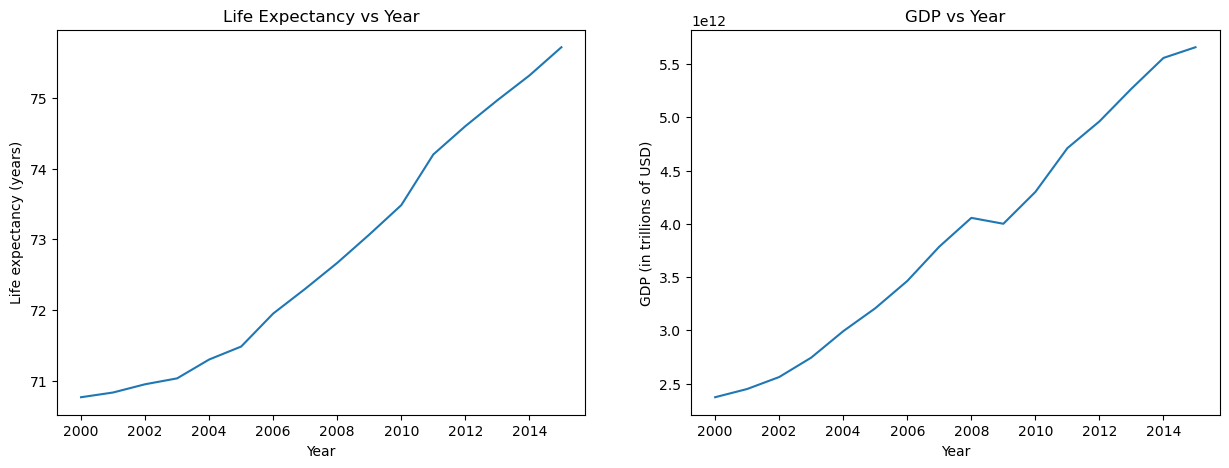

In [90]:
avg_life_by_year = data_df.groupby('Year')['Life expectancy at birth (years)'].mean().reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_life_by_year['Year'], avg_life_by_year['Life expectancy at birth (years)'])
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.title("Life Expectancy vs Year")

avg_gdp_by_year = data_df.groupby('Year')['GDP'].mean().reset_index()

plt.subplot(1, 2, 2)
plt.plot(avg_gdp_by_year['Year'], avg_gdp_by_year['GDP'])
plt.xlabel("Year")
plt.ylabel("GDP (in trillions of USD)")
plt.title("GDP vs Year")
plt.savefig("avg_vs_year.png")
plt.show()


When we chart the life expectancy and GDP vs year, we can see that they both increased stedily each year.

We can also see a small dip in the global GDP in 2009, which corresponds to the 2008 global recession.

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


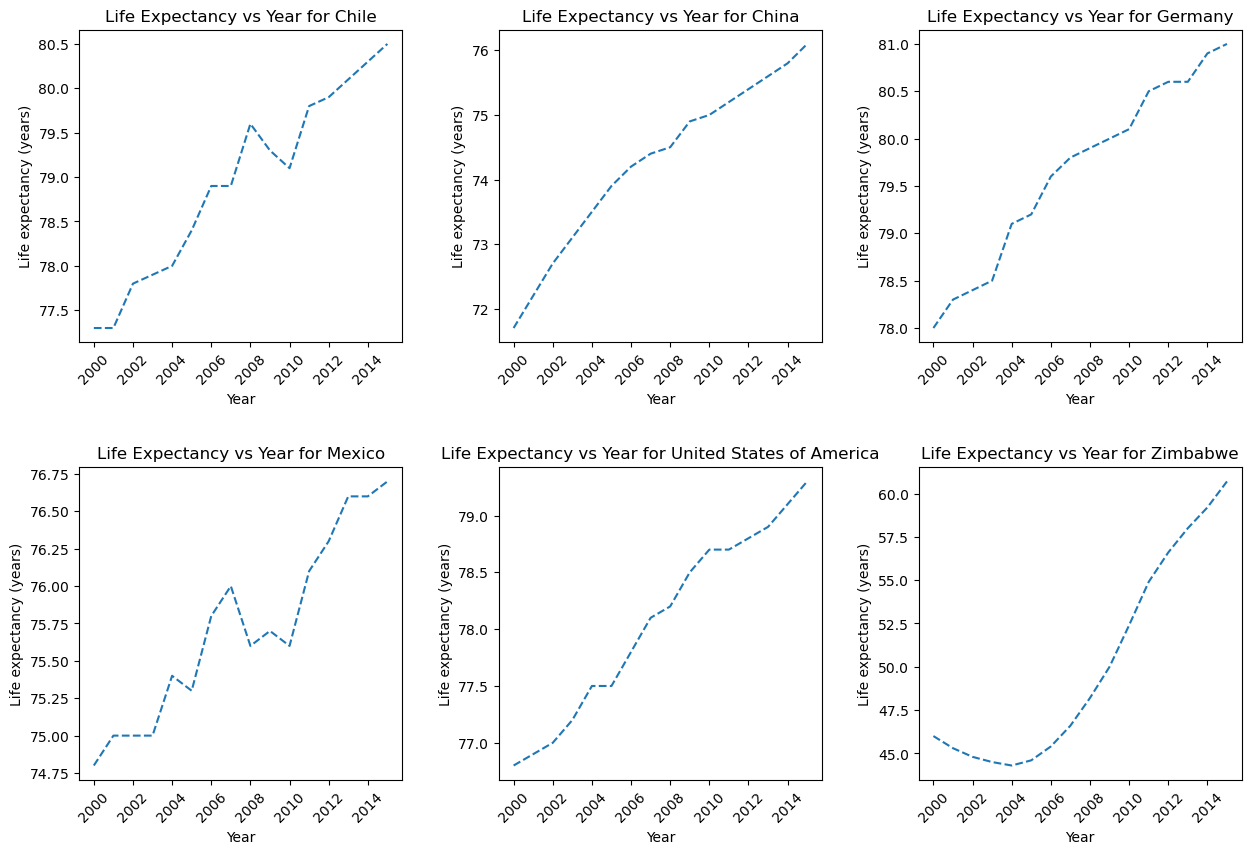

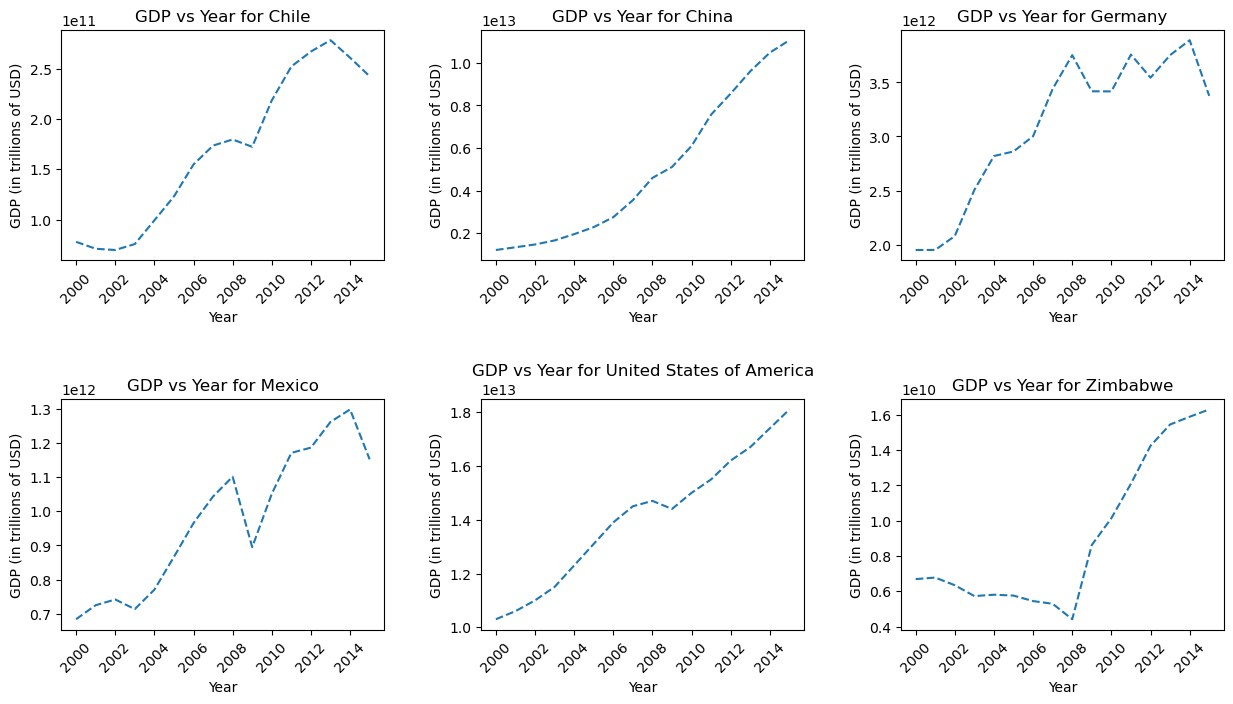

In [86]:
countries = data_df['Country'].unique()
print(countries)

index = 1
plt.figure(figsize=(15, 10))
for country in countries:
    country_df = data_df[data_df['Country'] == country]
    ax = plt.subplot(2, 3, index)
    plt.plot(country_df['Year'], country_df['Life expectancy at birth (years)'], linestyle='--')
    plt.subplots_adjust(wspace=0.3, hspace=0.4, bottom=0.2, top=0.95)
    plt.xlabel("Year")
    ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014])
    ax.set_xticklabels([str(year) for year in range(2000, 2015, 2)], rotation=45)
    plt.ylabel("Life expectancy (years)")
    plt.title(f"Life Expectancy vs Year for {country}")
    index += 1
plt.savefig("avg_life_per_country_per_year.png")
plt.show()

index = 1
plt.figure(figsize=(15, 8))
for country in countries:
    country_df = data_df[data_df['Country'] == country]
    ax = plt.subplot(2, 3, index)
    plt.plot(country_df['Year'], country_df['GDP'], linestyle='--')
    plt.subplots_adjust(wspace=0.3, hspace=0.6, bottom=0.2, top=0.95)
    plt.xlabel("Year")
    ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014])
    ax.set_xticklabels([str(year) for year in range(2000, 2015, 2)], rotation=45)
    plt.ylabel("GDP (in trillions of USD)")
    plt.title(f"GDP vs Year for {country}")
    index += 1

plt.savefig("avg_gdp_per_country_per_year.png")
plt.show()
# print(country_df.head())
# print(country_df.tail())
# print(country_df.describe())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


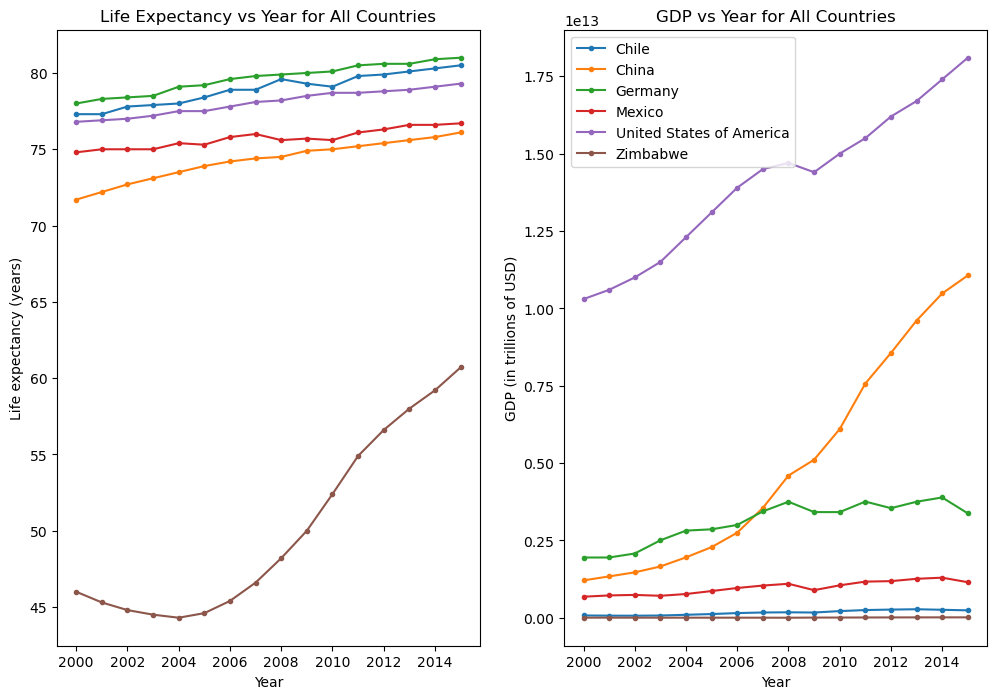

In [87]:
countries = data_df['Country'].unique()
print(countries)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
for country in countries:
    country_df = data_df[data_df['Country'] == country]
    # plt.subplot(2, 3, index)
    plt.plot(country_df['Year'], country_df['Life expectancy at birth (years)'], marker='o', markersize=3)

plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.title(f"Life Expectancy vs Year for All Countries")
# plt.legend(countries)
# plt.show()


# plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
for country in countries:
    country_df = data_df[data_df['Country'] == country]
    # plt.subplot(2, 3, index)
    plt.plot(country_df['Year'], country_df['GDP'], marker='o', markersize=3)

plt.xlabel("Year")
plt.ylabel("GDP (in trillions of USD)")
plt.title(f"GDP vs Year for All Countries")
plt.legend(countries)
plt.savefig("stacked_line.png")
plt.show()


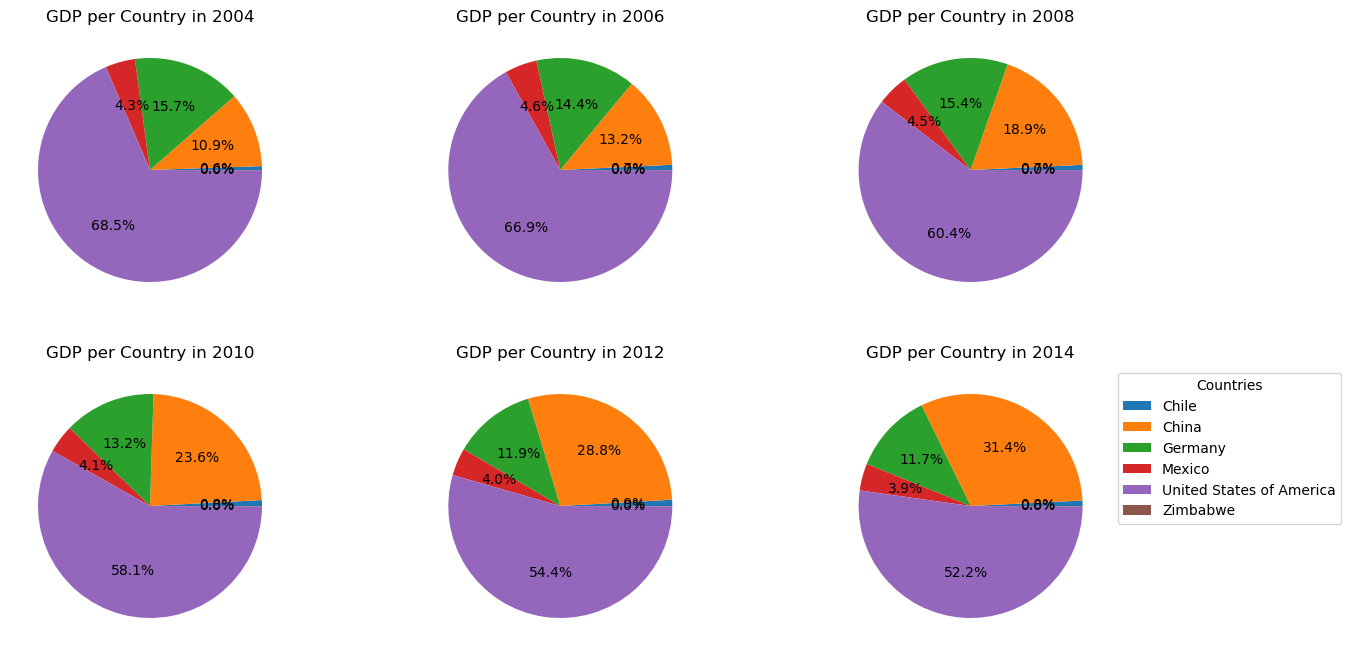

In [91]:
# Pie chart showing GDP

index = 1
plt.figure(figsize=(15, 8))
for curr_year in [year for year in range(2004, 2016, 2)]:
    ax = plt.subplot(2, 3, index)
    gdp_for_year = data_df[data_df['Year'] == curr_year]
    plt.pie(gdp_for_year["GDP"], autopct='%0.1f%%')
    plt.title(f"GDP per Country in {curr_year}")
    index += 1

plt.legend(gdp_for_year["Country"], title="Countries", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("gdp_pie_chart.png")
plt.show()



Now let's take a look at the Life expectancy and GDP per year for each country.

We can see that the Life expectancy overall increases year after year for each country, with Mexico being an exception, where the Life expectancy decreased for a while.

As for the GDP per year, it increases too, but it is a little more unpredictable, with serveral countries having more frequent peaks and valleys.

    Year  Life expectancy at birth (years)
0   2000                         70.766667
1   2001                         70.833333
2   2002                         70.950000
3   2003                         71.033333
4   2004                         71.300000
5   2005                         71.483333
6   2006                         71.950000
7   2007                         72.300000
8   2008                         72.666667
9   2009                         73.066667
10  2010                         73.483333
11  2011                         74.200000
12  2012                         74.600000
13  2013                         74.966667
14  2014                         75.316667
15  2015                         75.716667
    Year           GDP
0   2000  2.371583e+12
1   2001  2.448752e+12
2   2002  2.561221e+12
3   2003  2.743446e+12
4   2004  2.991647e+12
5   2005  3.207074e+12
6   2006  3.463349e+12
7   2007  3.785750e+12
8   2008  4.055986e+12
9   2009  4.000653e+12
10  2010  4.2995

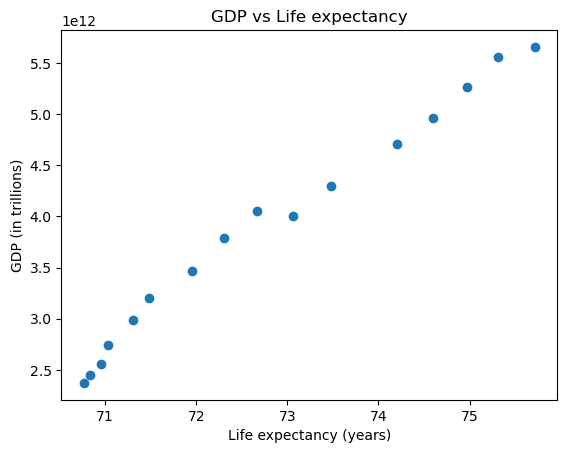

In [92]:
print(avg_life_by_year)
print(avg_gdp_by_year)
plt.scatter(avg_life_by_year['Life expectancy at birth (years)'], avg_gdp_by_year['GDP'])
plt.title("GDP vs Life expectancy")
plt.xlabel("Life expectancy (years)")
plt.ylabel("GDP (in trillions)")
plt.savefig("Life_expectancy_vs_GDP.png")
plt.show()

This graph shows that a high life expectency is associated with a high GDP, meaning that life expectency and GDP are positively correlated.